# Recurrent Neural Network

Recurrent neural networks give us a way to incorporate memory into our neural networks, and is critical in analyzing sequential data. RNN's are most often associated with text processing and text generation because of the way sentences are structured as a sequence of words

RNN's are used to analyze sequences of images; this can be useful in captioning video, as well as video classification, gesture recognition, and object tracking; all of these tasks see as input a sequence of image frames.


A general feedforward neural network like simple ANN, we send input X's through hidden layer and output from hidden layer is either sent to another hidden layer or to a fully connected layer that is we don't retain information from the output from the learnt hidden layer output. We pass it on. But in RNN, each output from neuron in hidden layer after activation function is added as input to the next input sequences, it takes previous state of hidden layer as input. These previous state can be termed as memory of the network.

## Udacity Notes:

There are two main differences between FFNNs(FeedForwardNeuralNetwork) and RNNs. The Recurrent Neural Network uses:

      * sequences as inputs in the training phase, and
   
      * memory elements
      
Memory is defined as the output of hidden layer neurons, which will serve as additional input to the network during next training step.

                                                 ***

As the neural network undergoes backpropagation, it updates the weights of the neural network. In RNN, as we feed the previous hidden state output to current state input over a large duration of time steps then during backpropagation through time while we update the weight over large number of time steps, the weight moves or reduces to zero causing a problem of vanishing gradient. 

What is Vanshing Gradient? If we have a large sequence of inputs either be it text or frames of images, the network retains information in layers which are closer by the output layer as the gradient value is large in last layers compared to the gradient value which is present near the input due the recursive partial differentiation happening duration backpropagation through time (BPTT).

## LSTM

To overcome the problem of RNN, a new neural network was developed called as LSTM(Long Short Term Memory). LSTM's are efficient in remembering things over long time steps of input sequences. Each LSTM node in neural network has multiple gates which helps in keeping important information from previous layers and forget not so important information with help of tanh/sigmoid function.


                                                 ***

## Udacity Notes: 

We know that RNNs are used to maintain a kind of memory by linking the output of one node to the input of the next. In the case of an LSTM, for each piece of data in a sequence (say, for a word in a given sentence), there is a corresponding hidden state $h_t$. This hidden state is a function of the pieces of data that an LSTM has seen over time; it contains some weights and, represents both the short term and long term memory components for the data that the LSTM has already seen.
So, for an LSTM that is looking at words in a sentence, the hidden state of the LSTM will change based on each new word it sees. And, we can use the hidden state to predict the next word in a sequence or help identify the type of word in a language model, and lots of other things!

                                                 ***

Each LSTM node has four gates which helps in efficient memory recollections and discarding unnecassary information. 

Gates in LSTM's are as follows 
    
    * Learn gate
    * Forget gate
    * Remember gate
    * Use gate
    
Each LSTM node has two kinds of memory, one is memory of events happened before large number of timesteps (LTM - Long Term Memory) and another is memory of events which happend in previous timesteps (STM - Short Term Memory). These memories get manipulated with current timestep to get the predicted result in gates mentioned above.


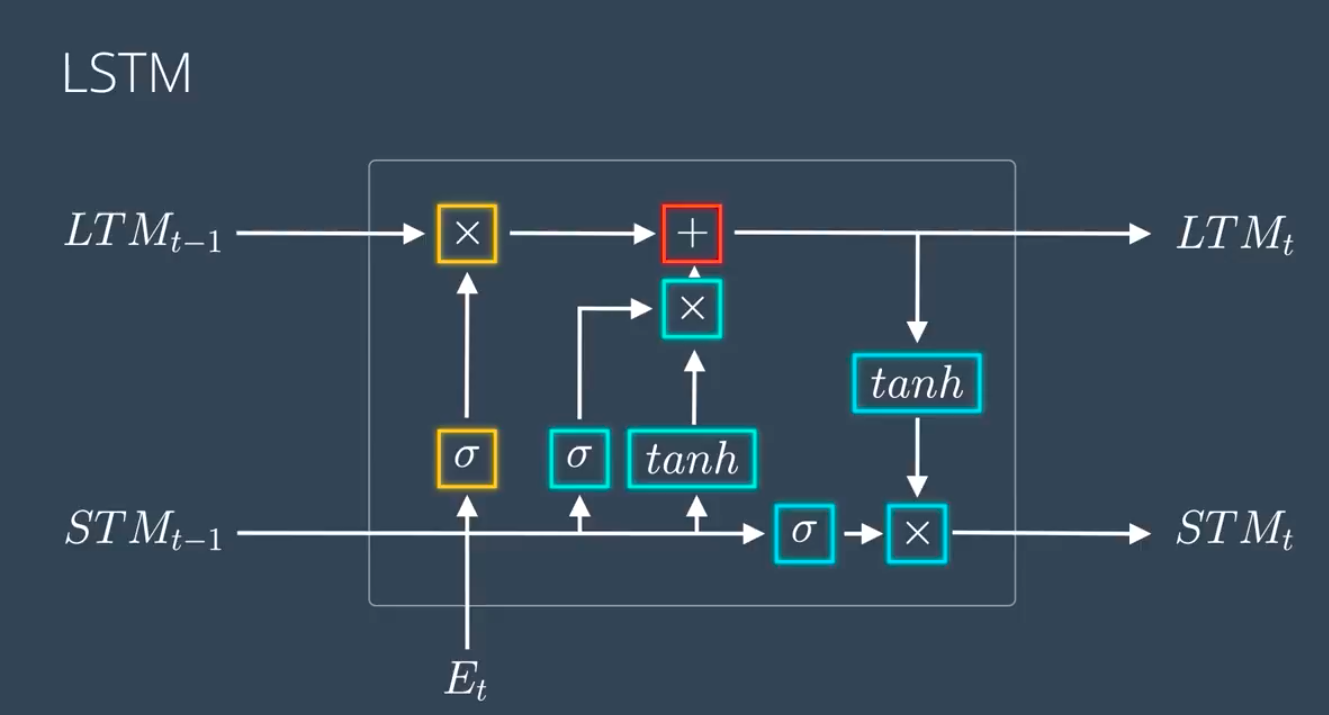

In [1]:
#Imagine the LSTM node as follows:
from IPython.display import Image
Image("/Users/mayurjain/Desktop/LSTM.png")

### Learn Gate:

It is a combination of both short term memory (STM_t-1) and current state input (E_t). These two vectors are combined linearly and multipled by weight matrix and adding bias, then passing through tanh function to get (N_t). Along with this operaation result, the output of this is multiplied with i_t vector (ignore factor) which is calculated by combining STM and E_t with new weight and bias over sigmoid function to ignore less important information.


        N_t = tanh(W_n[STM_t-1,E_t]+b_n)
        
        i_t = sigmoid(W_i[STM_t-1,E_t]+b_i)
        
        LG = N_t * i_t

### Forget Gate:

It combines LTM_t-1 with F_t where F_t is the forget factor. F_t is calculated using combination of STM_t-1 and E_t as seen in Learn Gate.

        F_t = sigmoid(W_p[STM_t-1,E_t]+b_p)
        FG(LTM_t) = LTM_t-1 * F_t

### Remember Gate:

Simplest of all gates, it adds the output from Forget Gate(FG) and Learn Gate(LG).

        RG = LG + FG
        RG = LTM_t-1*F_t + N_t*i_t

### Use Gate:

It combines the LG and FG. It applies tanh on output of FG and sigmoid on combination of STM_t-1 and E_t.

        U_t = tanh(W_u LTM_t-1.F_t + b_u)
        V_t = sigmoid(W_v[STM_t-1,E_t]+b_v)
        
        New STM = U_t * V_t

## Udacity Notes:

### Pytorch implementation of LSTM


To create and train an LSTM, you have to know how to structure the inputs, and hidden state of an LSTM. In PyTorch an LSTM can be defined as:

    lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=n_layers).

In PyTorch, an LSTM expects all of its inputs to be 3D tensors, with dimensions defined as follows:
     
     input_dim = the number of inputs (a dimension of 20 could represent 20 inputs)
     
     hidden_dim = the size of the hidden state; this will be the number of outputs that each LSTM cell produces at each time step.
     
     n_layers = the number of hidden LSTM layers to use; this is typically a value between 1 and 3; a value of 1 means that each LSTM cell has one hidden state. This has a default value of 1.


### Hidden State

    Once an LSTM has been defined with input and hidden dimensions, we can call it and retrieve the output and hidden state at every time step.
    
    out, hidden = lstm(input.view(1, 1, -1), (h0, c0))

    The inputs to an LSTM are (input, (h0, c0)).
         
         input = a Tensor containing the values in an input sequence; this has values: (seq_len, batch, input_size)
         
         h0 = a Tensor containing the initial hidden state for each element in a batch
         
         c0 = a Tensor containing the initial cell memory for each element in the batch
         
         h0 nd c0 will default to 0, if they are not specified. Their dimensions are: (n_layers, batch, hidden_dim).

These will become clearer in the example in this notebook. This and the following notebook are modified versions of this PyTorch LSTM tutorial.

Let's take a simple example and say we want to process a single sentence through an LSTM. If we want to run the sequence model over one sentence "Giraffes in a field", our input should look like this 1x4 row vector of individual words:

$$\begin{align}\begin{bmatrix}
   \text{Giraffes  } 
   \text{in  } 
   \text{a  } 
   \text{field} 
   \end{bmatrix}\end{align}$$

In this case, we know that we have 4 inputs words and we decide how many outputs to generate at each time step, say we want each LSTM cell to generate 3 hidden state values. We'll keep the number of layers in our LSTM at the default size of 1.

The hidden state and cell memory will have dimensions (n_layers, batch, hidden_dim), and in this case that will be (1, 1, 3) for a 1 layer model with one batch/sequence of words to process (this one sentence) and 3 genereated, hidden state values.


### Example Code

Next, let's see an example of one LSTM that is designed to look at a sequence of 4 values (numerical values since those are easiest to create and track) and generate 3 values as output. This is what the sentence processing network from above will look like, and you are encouraged to change these input/hidden-state sizes to see the effect on the structure of the LSTM!

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

%matplotlib inline

torch.manual_seed(2) # so that random variables will be consistent and repeatable for testing

### Define a simple LSTM

A note on hidden and output dimensions

The hidden_dim and size of the output will be the same unless you define your own LSTM and change the number of outputs by adding a linear layer at the end of the network, ex. fc = nn.Linear(hidden_dim, output_dim).

In [3]:
from torch.autograd import Variable

# define an LSTM with an input dim of 4 and hidden dim of 3
# this expects to see 4 values as input and generates 3 values as output
input_dim = 4
hidden_dim = 3
lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim)  

# make 5 input sequences of 4 random values each
inputs_list = [torch.randn(1, input_dim) for _ in range(5)]
print('inputs: \n', inputs_list)
print('\n')

# initialize the hidden state
# (1 layer, 1 batch_size, 3 outputs)
# first tensor is the hidden state, h0
# second tensor initializes the cell memory, c0
h0 = torch.randn(1, 1, hidden_dim)
c0 = torch.randn(1, 1, hidden_dim)


h0 = Variable(h0)
c0 = Variable(c0)
# step through the sequence one element at a time.
for i in inputs_list:
    # wrap in Variable 
    i = Variable(i)
    
    # after each step, hidden contains the hidden state
    out, hidden = lstm(i.view(1, 1, -1), (h0, c0))
    print('out: \n', out)
    print('hidden: \n', hidden)

inputs: 
 [tensor([[1.4934, 0.4987, 0.2319, 1.1746]]), tensor([[-1.3967,  0.8998,  1.0956, -0.5231]]), tensor([[-0.8462, -0.9946,  0.6311,  0.5327]]), tensor([[-0.8454,  0.9406, -2.1224,  0.0233]]), tensor([[ 0.4836,  1.2895,  0.8957, -0.2465]])]


out: 
 tensor([[[-0.4372,  0.2583,  0.2947]]], grad_fn=<StackBackward>)
hidden: 
 (tensor([[[-0.4372,  0.2583,  0.2947]]], grad_fn=<StackBackward>), tensor([[[-0.7344,  0.6209,  0.4191]]], grad_fn=<StackBackward>))
out: 
 tensor([[[-0.2836,  0.1314,  0.4133]]], grad_fn=<StackBackward>)
hidden: 
 (tensor([[[-0.2836,  0.1314,  0.4133]]], grad_fn=<StackBackward>), tensor([[[-0.5041,  0.2672,  0.6370]]], grad_fn=<StackBackward>))
out: 
 tensor([[[-0.3404,  0.4880,  0.1949]]], grad_fn=<StackBackward>)
hidden: 
 (tensor([[[-0.3404,  0.4880,  0.1949]]], grad_fn=<StackBackward>), tensor([[[-0.5552,  0.7909,  0.3300]]], grad_fn=<StackBackward>))
out: 
 tensor([[[-0.3544,  0.2405,  0.3150]]], grad_fn=<StackBackward>)
hidden: 
 (tensor([[[-0.3544,  0.2

You should see that the output and hidden Tensors are always of length 3, which we specified when we defined the LSTM with hidden_dim.

### All at once

A for loop is not very efficient for large sequences of data, so we can also, process all of these inputs at once.

    concatenate all our input sequences into one big tensor, with a defined batch_size
    
    define the shape of our hidden state
    
    get the outputs and the most recent hidden state (created after the last word in the sequence has been seen)

The outputs may look slightly different due to our differently initialized hidden state.

In [4]:
# turn inputs into a tensor with 5 rows of data
# add the extra 2nd dimension (1) for batch_size
inputs = torch.cat(inputs_list).view(len(inputs_list), 1, -1)

# print out our inputs and their shape
# you should see (number of sequences, batch size, input_dim)
print('inputs size: \n', inputs.size())
print('\n')

print('inputs: \n', inputs)
print('\n')

# initialize the hidden state
h0 = torch.randn(1, 1, hidden_dim)
c0 = torch.randn(1, 1, hidden_dim)

# wrap everything in Variable
inputs = Variable(inputs)
h0 = Variable(h0)
c0 = Variable(c0)
# get the outputs and hidden state
out, hidden = lstm(inputs, (h0, c0))

print('out: \n', out)
print('hidden: \n', hidden)

inputs size: 
 torch.Size([5, 1, 4])


inputs: 
 tensor([[[ 1.4934,  0.4987,  0.2319,  1.1746]],

        [[-1.3967,  0.8998,  1.0956, -0.5231]],

        [[-0.8462, -0.9946,  0.6311,  0.5327]],

        [[-0.8454,  0.9406, -2.1224,  0.0233]],

        [[ 0.4836,  1.2895,  0.8957, -0.2465]]])


out: 
 tensor([[[ 0.1611,  0.2200,  0.2213]],

        [[ 0.0364, -0.0390,  0.2638]],

        [[-0.1425, -0.0174,  0.1504]],

        [[-0.1583,  0.1264,  0.1709]],

        [[-0.2007, -0.1559,  0.2489]]], grad_fn=<StackBackward>)
hidden: 
 (tensor([[[-0.2007, -0.1559,  0.2489]]], grad_fn=<StackBackward>), tensor([[[-0.4429, -0.2975,  0.3252]]], grad_fn=<StackBackward>))


Demo: https://magenta.tensorflow.org/assets/sketch_rnn_demo/index.html

Matrix Multiplication: https://en.wikipedia.org/wiki/Matrix_multiplication

Activation Functions: https://github.com/Kulbear/deep-learning-nano-foundation/wiki/ReLU-and-Softmax-Activation-Functions

MSE: https://en.wikipedia.org/wiki/Mean_squared_error

Cross Entropy: https://www.ics.uci.edu/~pjsadows/notes.pdf

Linear Combination: http://linear.ups.edu/html/section-LC.html

Partial Derivatives: http://www.columbia.edu/itc/sipa/math/calc_rules_multivar.html

Common Derivatives: http://tutorial.math.lamar.edu/pdf/Common_Derivatives_Integrals.pdf

Learning Rate: http://blog.datumbox.com/tuning-the-learning-rate-in-gradient-descent/ ,
               http://cs231n.github.io/neural-networks-3/#loss
               
Gradient Clipping: https://arxiv.org/abs/1211.5063

LSTM: http://colah.github.io/posts/2015-08-Understanding-LSTMs/

LSTM: http://blog.echen.me/2017/05/30/exploring-lstms/

LSTM: https://www.youtube.com/watch?v=iX5V1WpxxkY

LSTM: https://deeplearning4j.org/docs/latest/deeplearning4j-nn-recurrent